In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Daten einlesen

In [2]:
df = pd.read_pickle("Rohdaten/c58_staking_data.pkl")
df

,group0__feature_0,group0__feature_1,group0__feature_2,group0__feature_3,group0__feature_4,group0__feature_5,group0__feature_6,group0__feature_7,group0__feature_8,group0__feature_9,group1__feature_0,group1__feature_1,group1__feature_2,group1__feature_3,id
0,0.365569,0.324112,0.762024,-0.373122,-1.184416,-0.900508,0.972732,0.310239,-0.953444,-0.059217,-0.348563,-0.960534,-0.562884,-0.130034,0
1,0.444764,0.471379,-0.085384,-0.373122,-1.398808,0.592319,0.026373,0.480262,-1.108196,-0.059217,-0.541528,0.176524,0.346141,-1.069655,1
2,0.328415,0.411231,-0.708222,-0.844989,-1.041489,0.592319,-0.139419,0.420130,-1.929925,-0.059217,0.424636,0.077649,0.399618,0.914411,2
3,0.639342,0.788726,-1.126775,-0.069779,-1.041489,0.253019,0.211661,0.792314,-1.249282,0.888417,1.261821,-1.207720,-1.044139,1.227799,3
4,0.133842,0.163365,-0.391679,-0.406827,-1.327344,1.203016,0.649325,0.181686,-0.279337,-0.059217,0.746579,-0.812222,-0.348999,-0.025753,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35727,-0.989600,-0.929728,-1.341202,-1.215741,-0.970025,1.067282,1.165700,-0.913094,2.479464,-1.375375,0.102693,0.720334,0.239196,0.705305,35727
35728,-1.171459,-1.083220,-1.688333,-0.811284,-1.184416,0.795885,-1.025949,-1.070672,2.289879,-1.085820,-0.605850,0.621460,0.346141,1.122974,35728
35729,-1.208613,-1.239819,-0.544826,-0.811284,-0.040996,0.863717,-0.484094,-1.226180,2.401224,-1.059497,-0.348563,1.016958,0.666975,-0.861092,35729
35730,-0.874222,-0.754460,-1.872120,-0.844989,-1.041489,1.135149,-0.279212,-0.736847,2.436508,-1.085820,-1.829635,0.176524,0.132252,-0.547704,35730


# Auf Konsistenz überprüfen

In [3]:
df.shape

(35732, 15)

In [4]:
df.dtypes

group0__feature_0    float64
group0__feature_1    float64
group0__feature_2    float64
group0__feature_3    float64
group0__feature_4    float64
group0__feature_5    float64
group0__feature_6    float64
group0__feature_7    float64
group0__feature_8    float64
group0__feature_9    float64
group1__feature_0    float64
group1__feature_1    float64
group1__feature_2    float64
group1__feature_3    float64
id                     int64
dtype: object

In [5]:
# Enthält NaN Werte?
df.isnull().values.any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
group0__feature_0,35732.0,7.063622e-15,1.000014,-4.168278,-0.501701,0.164639,0.666716,2.655466
group0__feature_1,35732.0,-2.886650e-15,1.000014,-4.107370,-0.522150,0.147808,0.669464,2.631640
group0__feature_2,35732.0,-2.024168e-15,1.000014,-3.352561,-0.626497,0.067763,0.731384,3.059233
group0__feature_3,35732.0,1.262786e-14,1.000014,-3.844712,-0.440531,0.031335,0.503202,3.536631
group0__feature_4,35732.0,-7.986055e-16,1.000014,-5.615171,-0.684170,-0.112460,0.602178,4.032440
group0__feature_5,35732.0,1.129128e-14,1.000014,-4.700391,-0.696942,-0.018378,0.660151,4.392202
group0__feature_6,35732.0,-6.468001e-15,1.000014,-5.629198,-0.467190,0.110516,0.632572,3.051624
group0__feature_7,35732.0,-1.436063e-16,1.000014,-4.107227,-0.524323,0.148508,0.667907,2.635603
group0__feature_8,35732.0,7.922317e-16,1.000014,-2.078140,-0.684958,-0.273394,0.337889,3.459355
group0__feature_9,35732.0,4.467672e-15,1.000014,-6.034574,-0.690973,-0.059217,0.598862,3.889257


# Daten visualisieren

## Alle Spalten

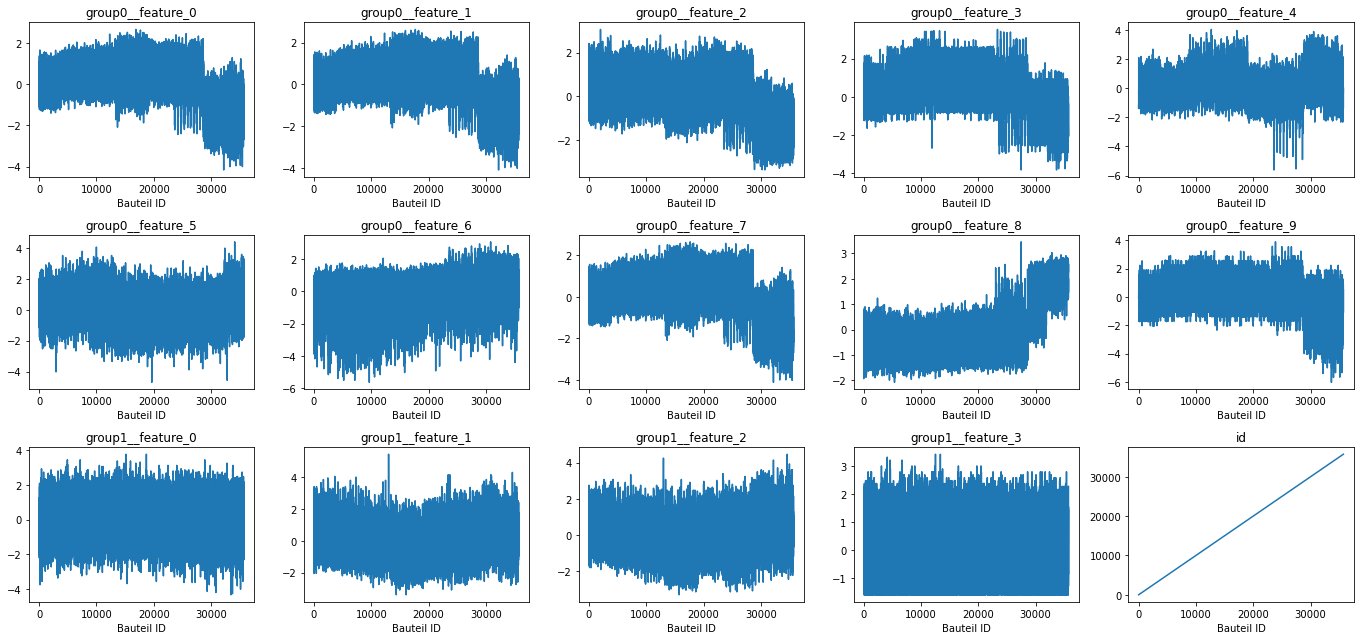

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(19, 9))

for i, ax in enumerate(axes.flatten()):
    ax.plot(df.iloc[:, i])
    ax.set_title(df.columns[i])
    ax.set_xlabel("Bauteil ID")

plt.tight_layout()
plt.show()

## Erste 30 Bauteile

In [8]:
def plot_columns(df, columns, startindex, endindex, title):
    plt.figure(figsize=(12, 8))

    for col in columns:
        plt.plot(df[col][startindex:endindex], label=col)

    plt.title(title)
    plt.xlabel("Bauteil ID")
    plt.legend()
    plt.show()

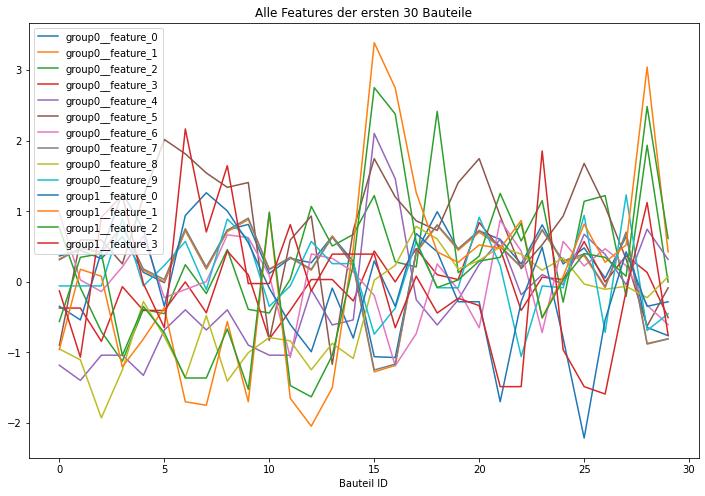

In [9]:
plot_columns(df, df.columns[:-1], 0, 30, "Alle Features der ersten 30 Bauteile")

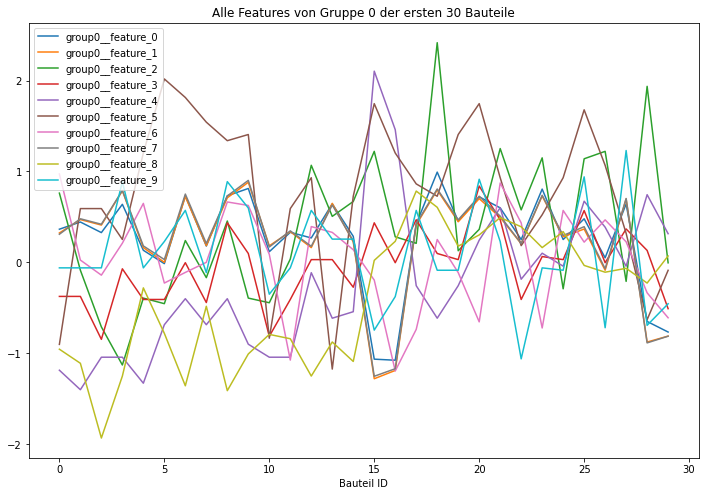

In [10]:
plot_columns(df, df.columns[:10], 0, 30, "Alle Features von Gruppe 0 der ersten 30 Bauteile")

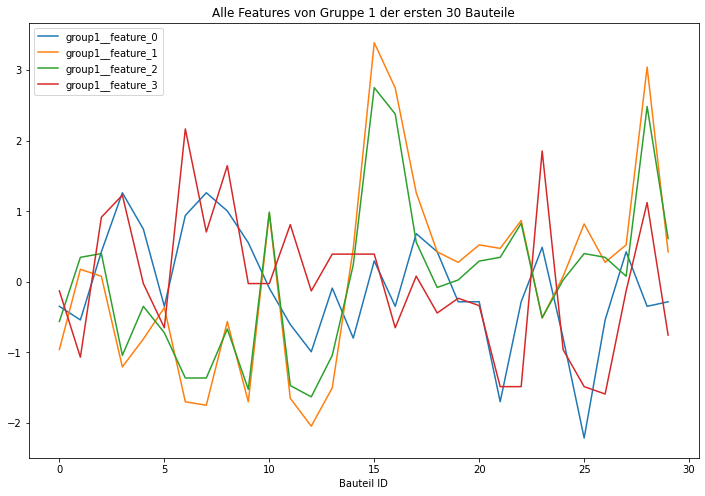

In [11]:
plot_columns(df, df.columns[10:-1], 0, 30, "Alle Features von Gruppe 1 der ersten 30 Bauteile")

# Korrelation untersuchen

In [12]:
df_corr = df.drop(columns=["id"]).corr(method="spearman")
df_corr

,group0__feature_0,group0__feature_1,group0__feature_2,group0__feature_3,group0__feature_4,group0__feature_5,group0__feature_6,group0__feature_7,group0__feature_8,group0__feature_9,group1__feature_0,group1__feature_1,group1__feature_2,group1__feature_3
group0__feature_0,1.000000,0.995544,0.546310,0.768231,-0.316428,0.047140,-0.373384,0.995743,-0.470054,0.730612,0.151542,-0.365434,-0.552159,0.019331
group0__feature_1,0.995544,1.000000,0.476778,0.752940,-0.330661,0.030119,-0.368100,0.999831,-0.463778,0.732981,0.154572,-0.378189,-0.564681,0.020302
group0__feature_2,0.546310,0.476778,1.000000,0.547383,-0.079560,0.014535,-0.273564,0.477012,-0.416087,0.360504,0.054023,-0.086608,-0.176500,0.003006
group0__feature_3,0.768231,0.752940,0.547383,1.000000,0.138722,0.057800,-0.523627,0.753466,-0.356552,0.837644,0.100488,-0.136740,-0.346832,0.009522
group0__feature_4,-0.316428,-0.330661,-0.079560,0.138722,1.000000,0.033634,-0.130185,-0.329891,0.237792,0.020990,-0.073043,0.295518,0.273196,-0.006957
group0__feature_5,0.047140,0.030119,0.014535,0.057800,0.033634,1.000000,-0.018935,0.046262,0.041308,0.094516,0.003202,0.059262,0.010098,-0.006464
group0__feature_6,-0.373384,-0.368100,-0.273564,-0.523627,-0.130185,-0.018935,1.000000,-0.368254,0.193485,-0.402531,-0.024425,-0.023939,0.140220,0.001970
group0__feature_7,0.995743,0.999831,0.477012,0.753466,-0.329891,0.046262,-0.368254,1.000000,-0.463285,0.734201,0.154425,-0.376621,-0.563757,0.020100
group0__feature_8,-0.470054,-0.463778,-0.416087,-0.356552,0.237792,0.041308,0.193485,-0.463285,1.000000,-0.370982,-0.057302,0.143600,0.176250,-0.010171
group0__feature_9,0.730612,0.732981,0.360504,0.837644,0.020990,0.094516,-0.402531,0.734201,-0.370982,1.000000,0.103584,-0.182186,-0.376761,0.011568


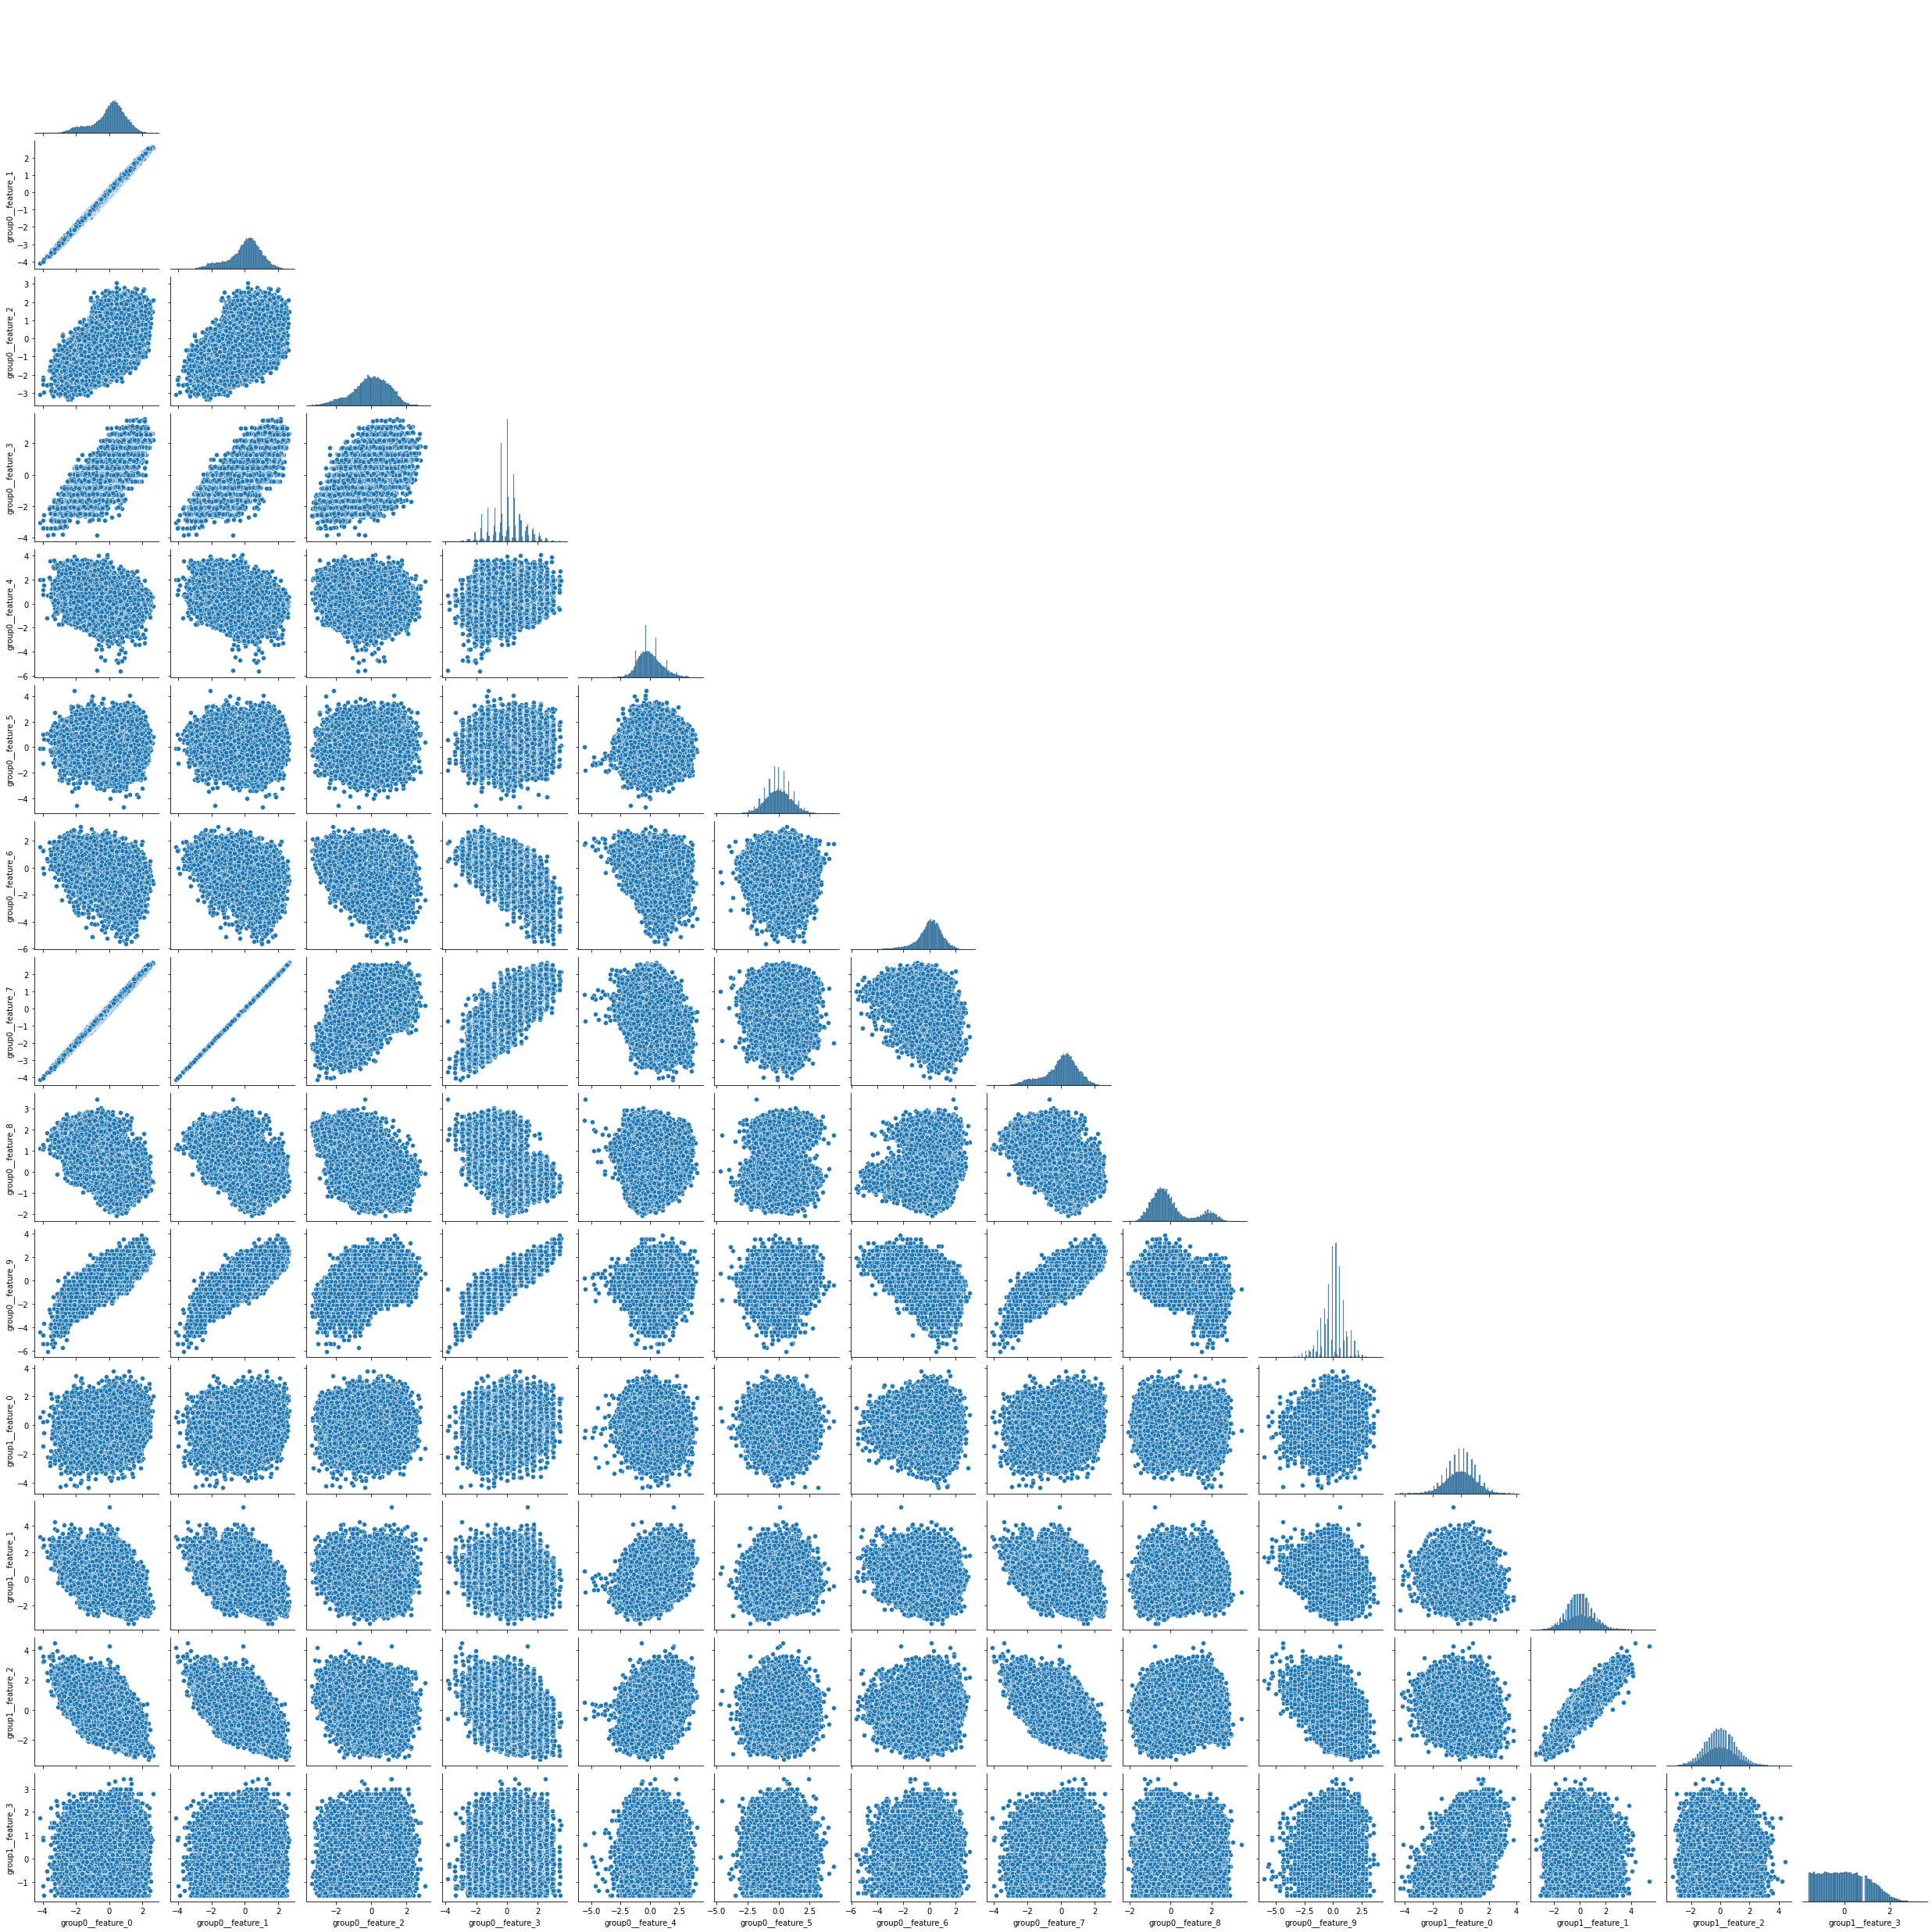

In [13]:
sns.pairplot(df.drop(columns=["id"]), corner=True)

## Feature 0, 1 und 7 sind sehr ähnlich

In [14]:
print(f'Korrelation zwischen Feature 0 und 1: {df_corr.loc["group0__feature_0", "group0__feature_1"]:.3f}')
print(f'Korrelation zwischen Feature 0 und 7: {df_corr.loc["group0__feature_0", "group0__feature_7"]:.3f}')
print(f'Korrelation zwischen Feature 1 und 7: {df_corr.loc["group0__feature_1", "group0__feature_7"]:.3f}')

Korrelation zwischen Feature 0 und 1: 0.996
Korrelation zwischen Feature 0 und 7: 0.996
Korrelation zwischen Feature 1 und 7: 1.000


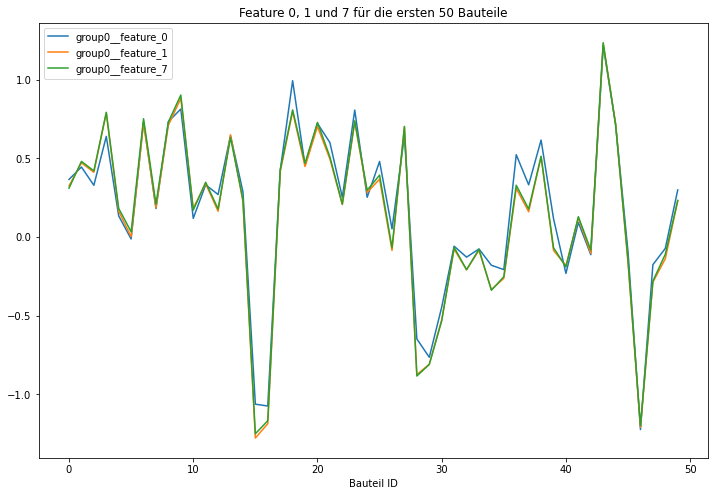

In [15]:
plot_columns(df, ["group0__feature_0", "group0__feature_1", "group0__feature_7"], 0, 50, "Feature 0, 1 und 7 für die ersten 50 Bauteile")

**Schlussfolgerung:**
- Nur 1 der 3 Features für das Modell verwenden, z.B. Feature 1
- Experimentell untersuchen, ob es einen Unterschied macht, ob man alle 3 oder nur 1 Feature verwendet